In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import metrics
from math import sqrt

df = pd.read_csv('result.csv')
# cols_drop = []
# for col in df.columns.values:
#     if df[col].isnull().sum() > 0:
#         mean = df[col].mean()
#         df[col].fillna(mean, inplace =True)
# df = df.drop(cols_drop, axis=1)
df = df.fillna(0)
region = df.region_name.unique()
def split_region(i):
    val_state = np.array([region[2*i], region[2*i+1], region[2*i+2]])
    train = df.loc[~np.in1d(df['region_name'], val_state)]
    val = df.loc[np.in1d(df['region_name'], val_state)]
    return (train, val)

def cross_val(neigh,typ):
    score_list_cv = []
    
    if typ == "region":
        for i in range(0,5):
            train, val = split_region(i)
            x_train = train.iloc[:,2:-1]
            y_train = train.iloc[:, -1]
            x_val = val.iloc[:,2:-1]
            y_val = val.iloc[:,-1] 
    
            neigh.fit(x_train, y_train)
            y_pred = neigh.predict(x_val)
            score_list_cv.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))
        return min(score_list_cv)
    
    elif typ == "time":
            # if i == 0:
            train = df.loc[df['date'] < '2020-08-10']
            val = df.loc[df['date'] >= '2020-08-10']
            # else:
                # train = df.loc[df['date'] >= '2020-08-10']
                # val = df.loc[df['date'] < '2020-08-10']
            
            x_train = train.iloc[:,2:-1]
            y_train = train.iloc[:, -1]
            x_val = val.iloc[:,2:-1]
            y_val = val.iloc[:,-1] 
        
            neigh.fit(x_train, y_train)
            y_pred = neigh.predict(x_val)
            score_list_cv.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))
            return min(score_list_cv)     
    return 0


In [9]:
score_list = []
for k in range(1,100):
    '''
    score_list_cv = []
    for i in range(0,4):
        train, val = split_region(i)
        x_train = train.iloc[:,2:-1]
        y_train = train.iloc[:, -1]
        x_val = val.iloc[:,2:-1]
        y_val = val.iloc[:,-1] 
    
        neigh = KNN(k)
        neigh.fit(x_train, y_train)
        y_pred = neigh.predict(x_val)
        score_list_cv.append(sqrt(metrics.mean_absolute_error(y_val,y_pred)))
    score_list.append(min(score_list_cv))
    '''
    score_list.append(cross_val(KNN(k,p = 3),"region"))


In [10]:
print(min(score_list))
print(score_list)

38.488823097483184
[63.4675770242833, 62.3057202652997, 57.425915773883276, 52.185093923243805, 48.57539386241648, 48.55843177344482, 49.35539128125799, 48.98301682726371, 49.06697922158458, 50.081912902763605, 50.18532138994367, 50.395469985522794, 51.01954930780293, 51.214740096720234, 51.13764963191546, 52.01671406064273, 52.772429320853256, 53.000767717089, 53.19066386188773, 53.14202433103203, 52.956421137408256, 52.92732902710156, 52.839138762579985, 52.18374616868293, 51.24887684406145, 49.868274050131184, 48.18451744475538, 46.97381172627189, 45.97555471830042, 45.821982836964956, 44.90722518546709, 44.612078569076694, 44.48952030074211, 43.72553954538673, 43.00036386493732, 46.745555289250895, 48.04827562821478, 48.40442005526382, 48.12676140433489, 47.489845040223535, 47.16440826057466, 46.468760654930755, 45.8338789812973, 45.22843731052271, 44.76247185026096, 44.11519661475791, 43.60240105542236, 43.155330349978094, 42.648077370514144, 42.201725609795204, 42.13036275068991,

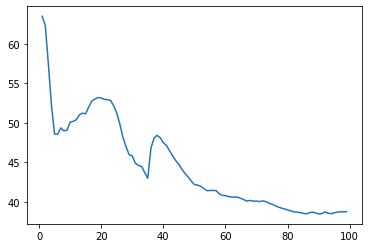

In [11]:
plt.plot(range(1,100),score_list)

48.16209939989007
[48.97692409260966, 58.142287252482774, 48.16209939989007, 54.965388534140466, 57.650218708004935, 48.919201692824764, 49.59121569293062, 69.62367293275659, 63.722698354905695, 53.918319569374425, 72.80604200948174, 66.73628656469016, 67.30101901527068, 69.16405617563697, 64.08423276351905, 54.498827714201546, 64.70059247539135]


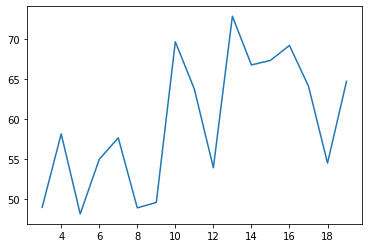

In [5]:
score_list = []
for k in range(3,20):
    #score_list.append(cross_val(DTR(max_depth=k)))
    score_list.append(cross_val(DTR(max_depth=k,random_state=10),"region"))
    
print(min(score_list))
print(score_list)
plt.plot(range(3,20),score_list)

34.70650169473016
[87.22932624492095, 57.866591490377985, 55.815775490902155, 50.636710506240995, 49.3971803706591, 47.861282692301316, 46.266055837303924, 42.81786332411809, 41.58531343696706, 43.243213753308, 42.77005232675146, 43.41757636602946, 42.85107962886415, 42.59813314597091, 42.06122380077698, 41.09597444413981, 40.24805684848761, 39.41568193172429, 39.20192764122059, 38.29961388979193, 37.78557818818213, 36.780464336630956, 35.97949135648907, 35.58162803813572, 35.0998019937435, 34.96668785897102, 34.89698629058665, 34.76001911063095, 34.75600695613016, 34.9018780478908, 34.910171364013436, 34.905144027633575, 34.83648532349878, 34.70650169473016, 34.954643351588274, 35.05936706931753, 35.40861250911303, 35.34445375946846, 35.63700838099809, 35.75621043708951, 36.09725197626481, 36.35105492556564, 36.34458117912905, 36.46266314172559, 36.33499923368885, 36.31320197846379, 36.4687829110442, 36.57511531321331, 36.78626254630796, 36.869435463925555, 36.94443733117534, 36.96819

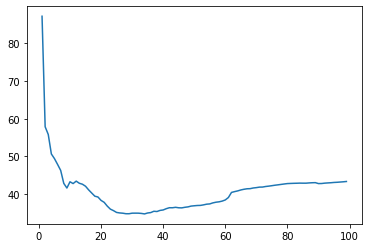

In [6]:
score_list = []
for k in range(1,100):
    score_list.append(cross_val(KNN(k),"time"))

print(min(score_list))
print(score_list)
plt.plot(range(1,100),score_list)

48.2258857927527
[65.69870360584113, 123.29390406202981, 66.97107137610713, 118.9430867378785, 112.29790019282576, 68.9262172685902, 70.22404181540176, 69.1789332561089, 69.48734624457506, 70.02764838291752, 71.35065113187294, 114.21968632237761, 48.7386070624421, 113.75366028745907, 114.29122771299141, 71.50913091047484, 48.2258857927527]


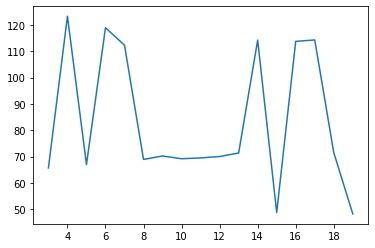

In [7]:
score_list = []
for k in range(3,20):
    #score_list.append(cross_val(DTR(max_depth=k)))
    score_list.append(cross_val(DTR(max_depth=k,random_state=10),"time"))
    
print(min(score_list))
print(score_list)
plt.plot(range(3,20),score_list)

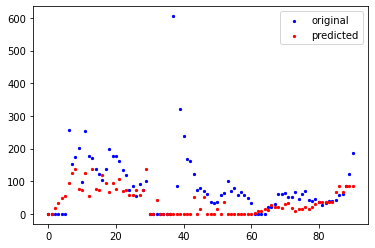

In [8]:
knn = KNN(2)

train, val = split_region(4)
knn.fit(train.iloc[:,3:-1], train.iloc[:,-1])
pred = knn.predict(val.iloc[:,3:-1])

plt.scatter(range(len(val.iloc[:,-1])), val.iloc[:,-1], s=5, color="blue", label="original")
plt.scatter(range(len(val.iloc[:,-1])), pred, s=5, color="red", label="predicted")
plt.legend()
plt.show()